# MNIST 손글씨 - CNN 1
- 2 Conv2d layers
- 1 Fully Connected Network layer
- 1 Output layer

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

## 데이터 전처리

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


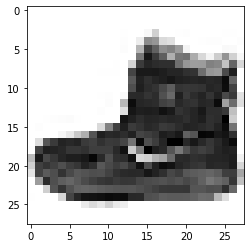

In [3]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [ ]:
class_names = []
class_names[y_train[0]]

In [4]:
#0 ~ 1 사이의 값으로 정규화 
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
# 3차원 데이터를 2차원으로 (데이터는 2차원을 3차원으로)
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [6]:
# One hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

## 모델 정의, 설정, 학습, 평가

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [9]:
model = ([
    Conv2D(32, (3,3), input_shape(28,28,1), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    Flatten(),                                                  # n차원을 1차원으로 변환
    Dense(512, activation='relu'),
    Dense(10,activation='softmax')
    ])
model.summary()

NameError: name 'input_shape' is not defined

In [ ]:
model.compile(
    optomizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy']
)

In [ ]:
# 모델 최적화를 위한 설정
modelpath = 'model/best_mnist_cnn_1.h5'
checkpoint = ModelCheckpoint( modelpath, verbose=1, save_best_only=True )
early_stopping = EarlyStopping( patience=10 )

In [ ]:
# 모델 학습
history = model.fit(
    X_train, Y_train, validation_split = 0.2,
    epochs=50, batch_size=200, verbose=0,
    callbacks= [checkpoint, early_stopping]
)